In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import csv

# Read the Data

In [2]:
data = pd.read_csv('RFLFSODataFull.csv')
print(data.columns)
print(data.info())
print(data.describe())

Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Di

In [3]:
# check for missing value
data.isnull().sum()
# data.isna().any()
# no missing value

FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64

In [4]:
# Remove the first row in TemperatureDifference
data = data[data['TemperatureDifference'] != data['TemperatureDifference'].max()]
data

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
5,7.265418,4.269340,16.840204,17.284007,15.254687,2119.633353,73500000000,0.000000,0.000000,0.000000,...,26.194161,25.046051,10,59097.042680,64733.435152,53684.195622,97.055573,1.294879,2.858242,1.167095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


In [5]:
# convert some variables as categorical variables
data["Frequency"] = data["Frequency"].astype(object)
data["Time"] = data["Time"].astype(object)
data["SYNOPCode"] = data["SYNOPCode"].astype(object)

print(data[["Frequency","Time","SYNOPCode"]].describe(include='all'))

          Frequency   Time  SYNOPCode
count         91378  91378      91378
unique            2     24          7
top     73500000000      7          0
freq          45689   4119      56963


In [6]:
data['FSO_Att'].describe()

count    91378.000000
mean         6.769445
std          3.903863
min          0.788363
25%          3.473055
50%          6.336161
75%          8.664998
max         32.455222
Name: FSO_Att, dtype: float64

## Data Properties
### Distribution of Attenuation

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


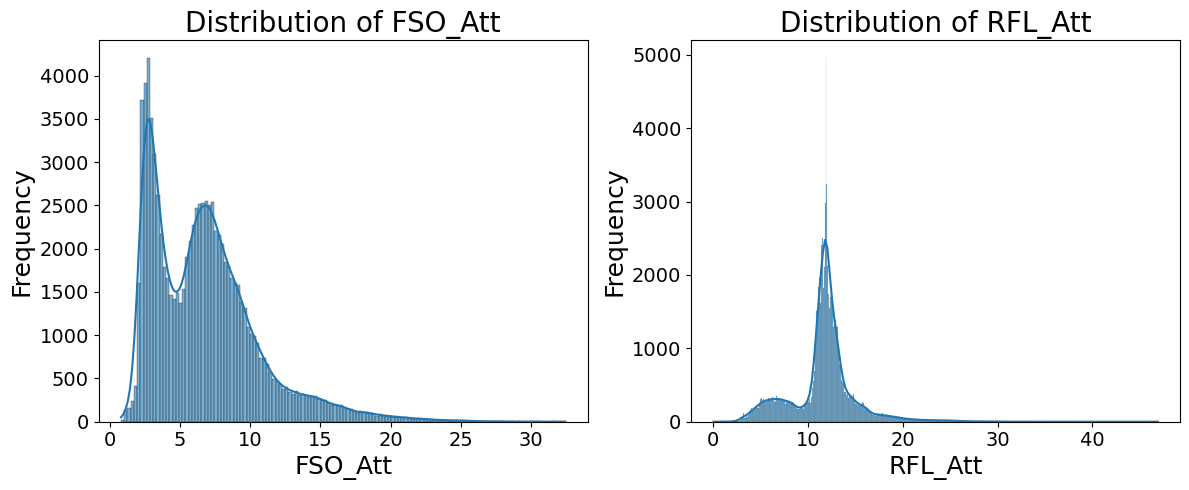

In [ ]:
Att = ['FSO_Att', 'RFL_Att']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, column in enumerate(Att):
    ax = sns.histplot(data[column], kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Distribution of {column}', fontsize=20)
    axes[i].set_xlabel(column, fontsize=18)
    axes[i].set_ylabel('Frequency', fontsize=18)
    
    
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=14)  

plt.tight_layout()
plt.show()

In [10]:
data[(data['FSO_Att'] >= 0) & (data['FSO_Att'] <= 5)].shape[0]

34076

In [ ]:
# Assuming your data is already loaded as `data`
Att = ['FSO_Att', 'RFL_Att']

# Create a 1x2 grid for the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Set font size for the titles
title_fontsize = 14
label_fontsize = 12

for i, column in enumerate(Att):
    ax = axes[i]  # obtain subplot index

    sns.histplot(data[column], bins=30, kde=True, ax=ax, alpha=0.6)
    ax.set_title(f'Distribution of {column}', fontsize=20)
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

### Plots of Frequency, SYNOPCode, and Time

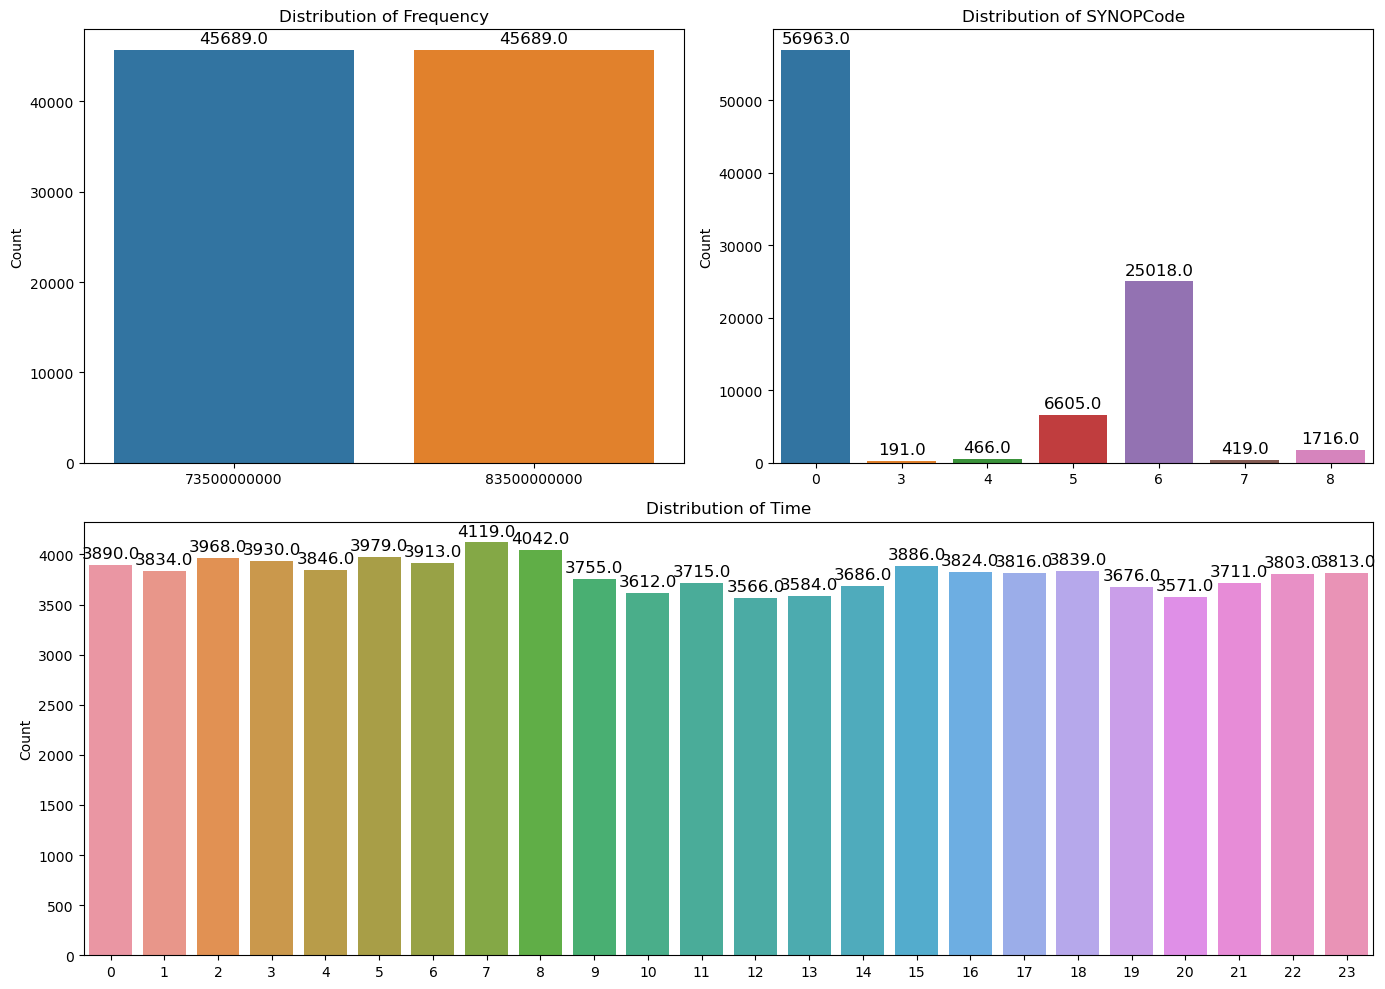

In [12]:
# plot the distribution of all cat var
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a figure with a 2x2 GridSpec layout
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1])

# Plotting the first two categorical variables
for i, column in enumerate(categorical_columns[:-1]):
    ax = fig.add_subplot(gs[0, i])
    sns.countplot(data=data, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Adding counts on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plotting the last categorical variable spanning both columns in the second row
ax = fig.add_subplot(gs[1, :])
sns.countplot(data=data, x=categorical_columns[-1], ax=ax)
ax.set_title(f'Distribution of {categorical_columns[-1]}')
ax.set_xlabel('')
ax.set_ylabel('Count')

# Adding counts on top of each bar for the last plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

#plt.suptitle('Figure 2: Distribution of Categorical Variables', y=1.02)
plt.tight_layout()
plt.show()

### Featurs Table of Five Number Summary

In [13]:
# remove catgorical vairables
Att.extend(categorical_columns)

selected_data = data.drop(columns=Att)

table = round(selected_data.describe().drop(['count']).transpose(),2)

table

,mean,std,min,25%,50%,75%,max
AbsoluteHumidity,9.55,5.86,1.14,4.96,6.87,14.05,24.79
AbsoluteHumidityMax,10.03,6.16,1.24,5.21,7.21,14.78,26.41
AbsoluteHumidityMin,9.08,5.58,1.05,4.71,6.52,13.38,24.27
Distance,3297.94,1224.31,2012.00,2019.43,2959.86,4820.89,4828.00
Particulate,27.07,72.13,0.00,0.00,0.00,16.95,1621.00
ParticulateMax,28.42,75.76,0.00,0.00,0.00,17.78,1753.75
ParticulateMin,25.72,68.60,0.00,0.00,0.00,16.04,1500.67
RainIntensity,0.25,1.64,0.00,0.00,0.00,0.00,87.26
RainIntensityMax,0.26,1.71,0.00,0.00,0.00,0.00,92.02
RainIntensityMin,0.23,1.55,0.00,0.00,0.00,0.00,82.27


### Distribution of Particulate and Rain Intensity

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

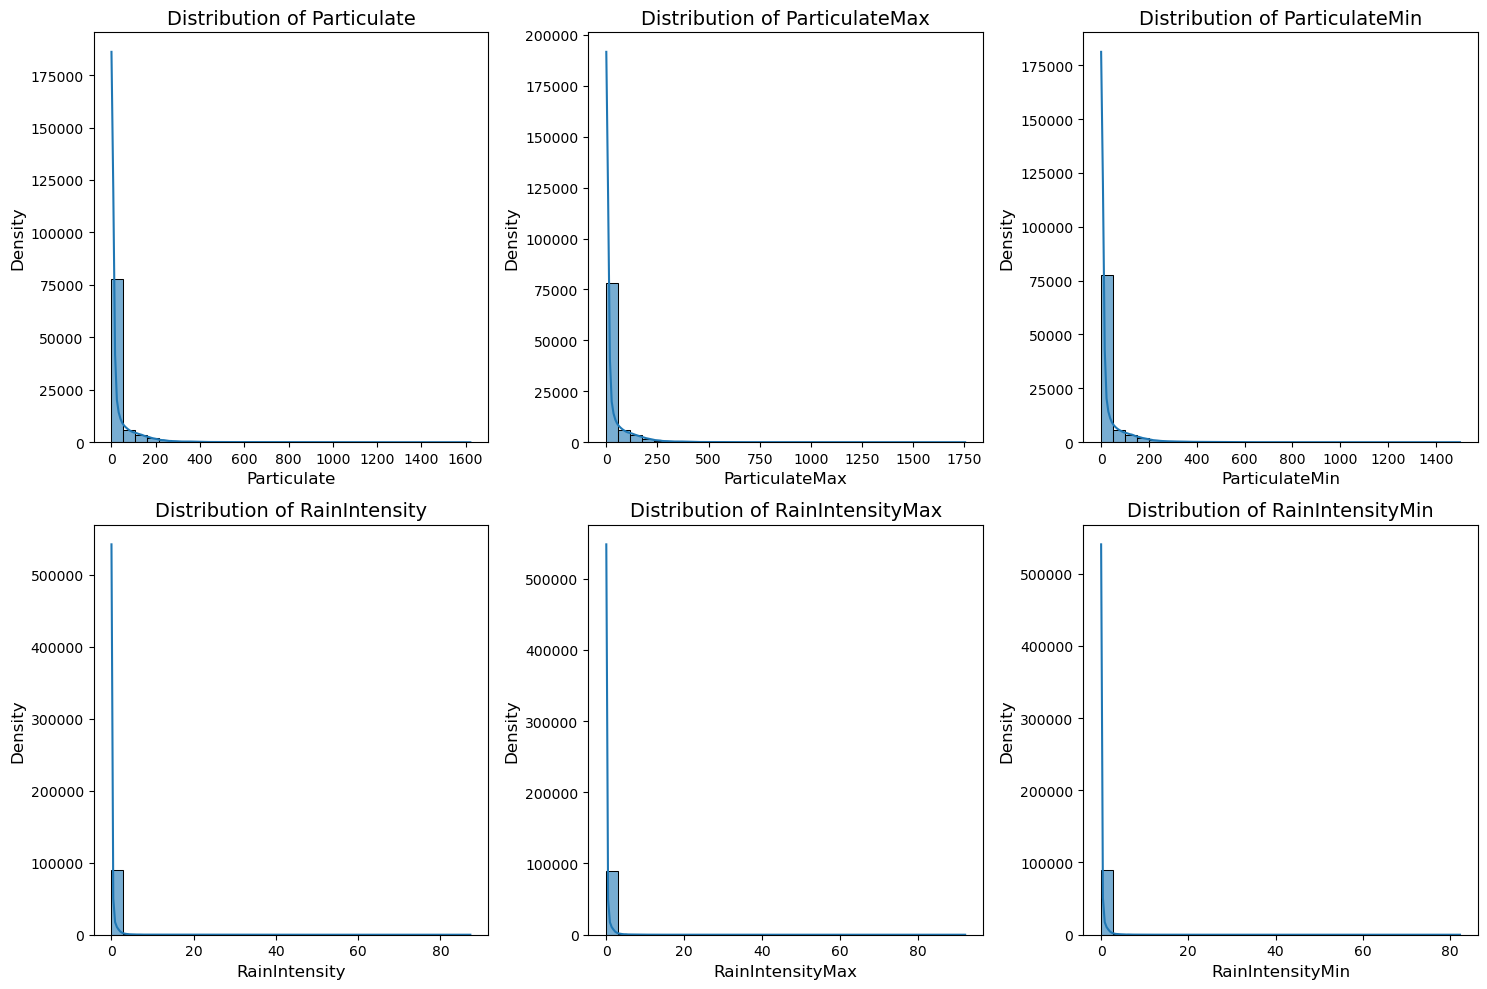

In [14]:
lst1 = ['Particulate', 'ParticulateMax', 'ParticulateMin',
        'RainIntensity', 'RainIntensityMax', 'RainIntensityMin']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

title_fontsize = 14
label_fontsize = 12

for i, column in enumerate(lst1):
    ax = axes[i // 3, i % 3]  
    sns.histplot(data[column], bins=30, kde=True, ax=ax, alpha=0.6)
    ax.set_title(f'Distribution of {column}', fontsize=title_fontsize)
    ax.set_xlabel(column, fontsize=label_fontsize)
    ax.set_ylabel('Density', fontsize=label_fontsize)

plt.tight_layout()
plt.show()

### Distribution of Humidity

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


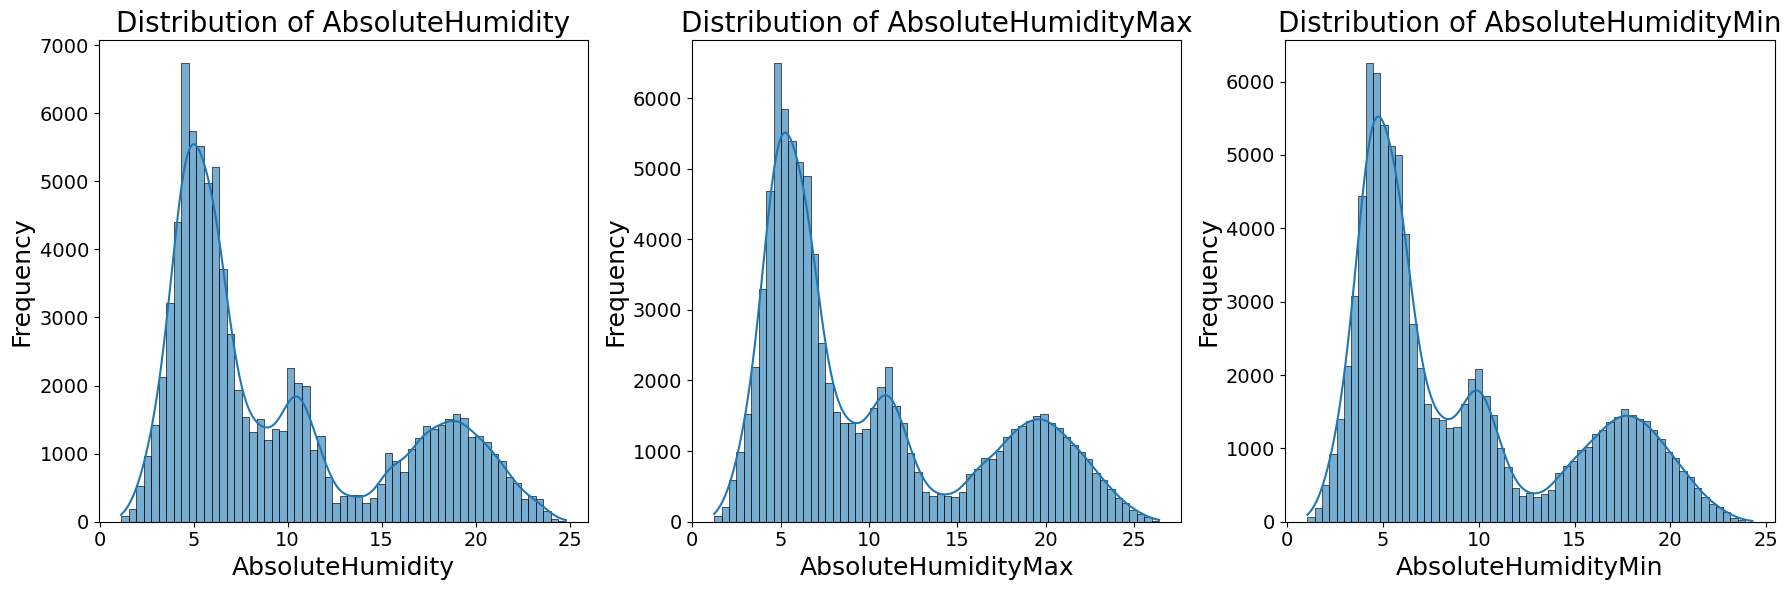

In [15]:
humidity = ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(humidity):
    ax = sns.histplot(data[column], kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Distribution of {column}', fontsize=20)
    axes[i].set_xlabel(column, fontsize=18)
    axes[i].set_ylabel('Frequency', fontsize=18)
    
    # Increase font size of tick labels
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=14)  

plt.tight_layout()
plt.show()

### Distribution of Distance, RH, WD, VI, and WS

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

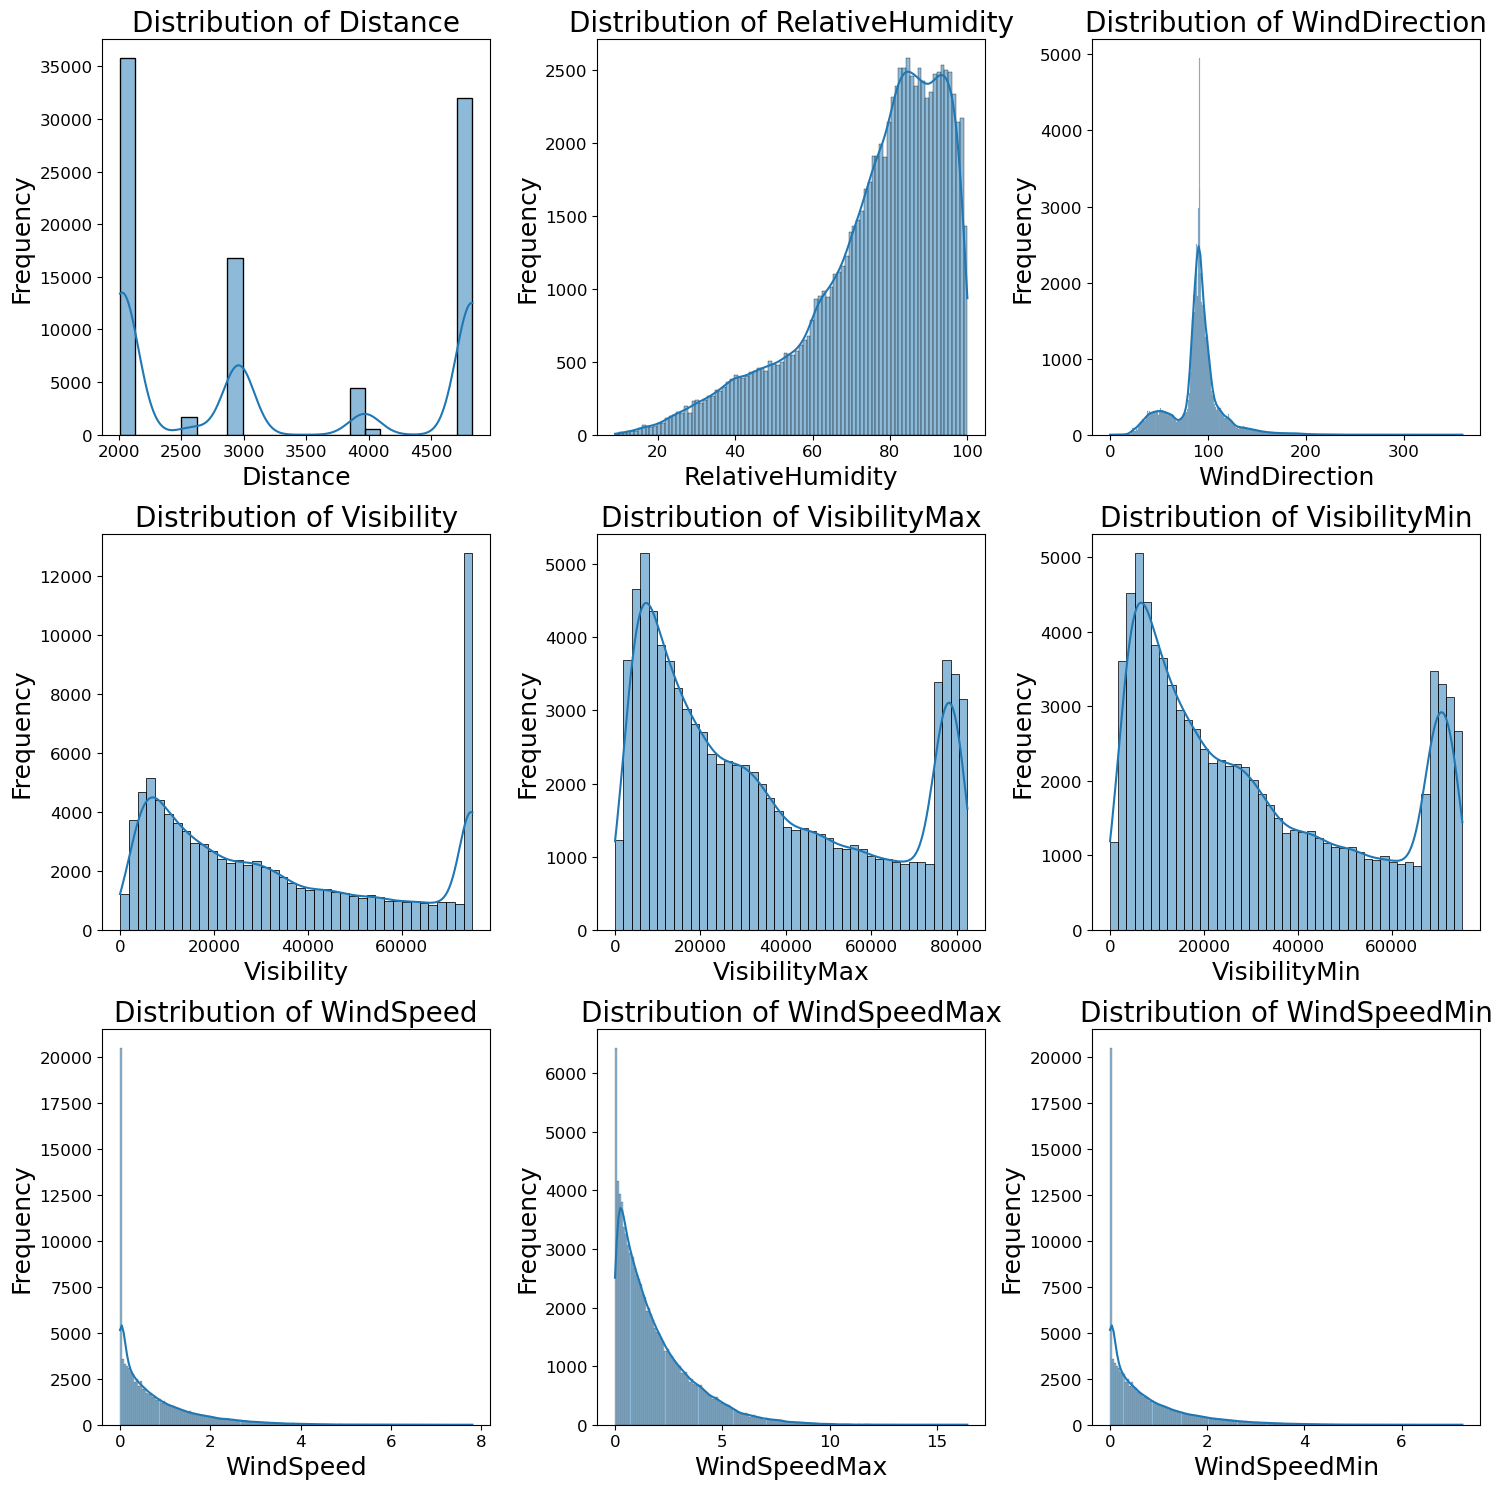

In [16]:
lst2 = ['Distance','RelativeHumidity','WindDirection',
        'Visibility','VisibilityMax','VisibilityMin',
        'WindSpeed','WindSpeedMax','WindSpeedMin']

ig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(lst2):
    ax = sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize = 20)
    axes[i].set_xlabel(column, fontsize = 18)
    axes[i].set_ylabel('Frequency', fontsize = 18)

    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].tick_params(axis='both', which='minor', labelsize=12) 

plt.tight_layout()
plt.show()

### Distribution of Temperature

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

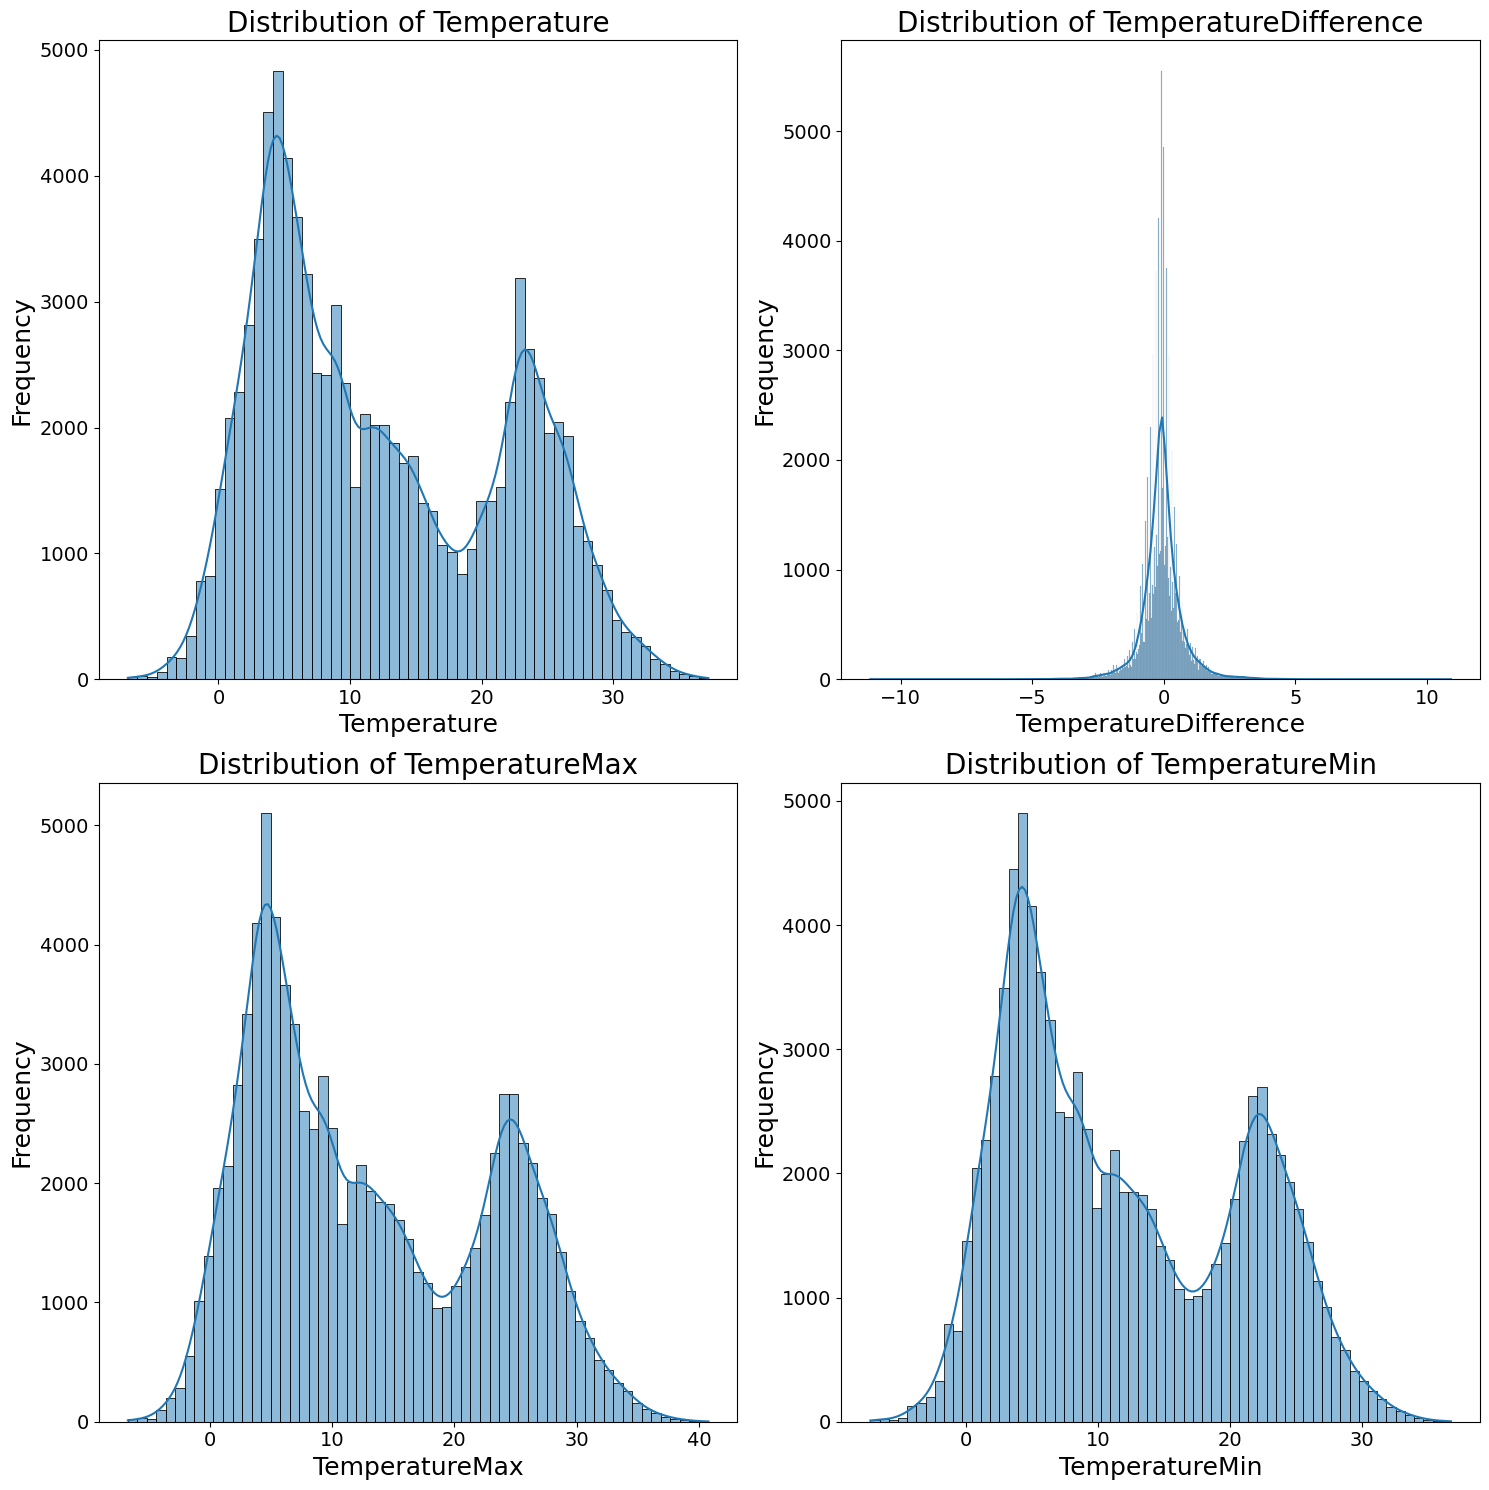

In [17]:
lst3 = ['Temperature','TemperatureDifference','TemperatureMax','TemperatureMin']

ig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(lst3):
    ax = sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=20)
    axes[i].set_xlabel(column, fontsize=18)
    axes[i].set_ylabel('Frequency', fontsize=18)

    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=14) 

plt.tight_layout()
plt.show()

### Correlation Heatmap

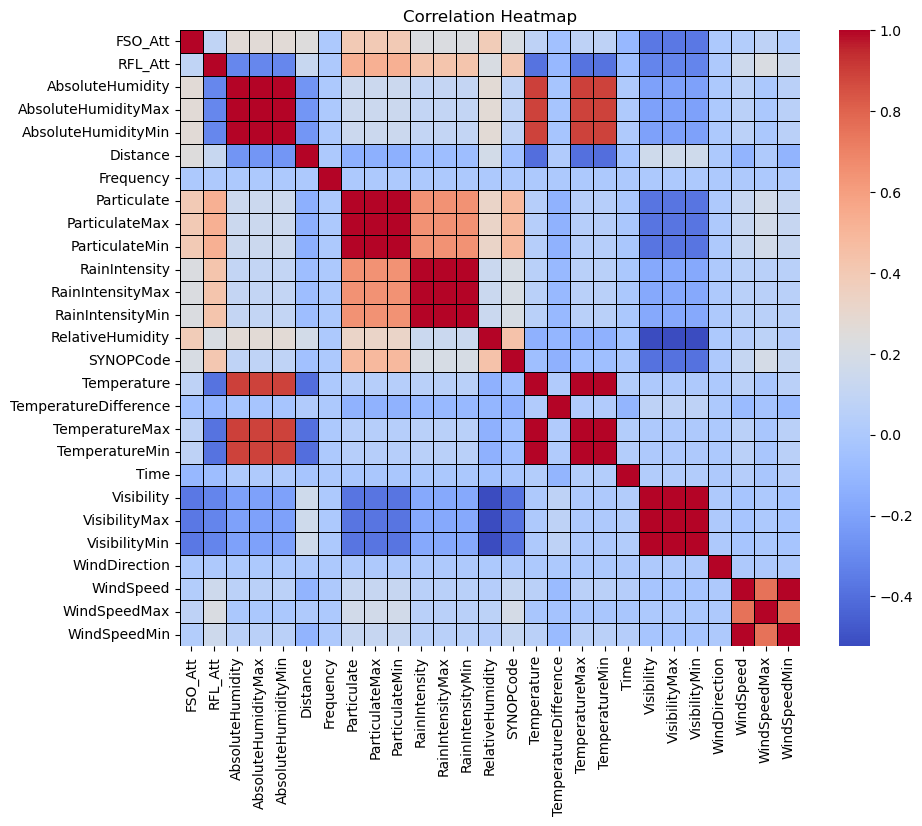

In [18]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

# Decision Tree

In [22]:
# split the data into training, test and validation
def split_data(data, Att, drop_column = [],test_size=0.3, valtest_available = 1, random_state=42):

    data_temp = data.drop(columns=[Att])
    if drop_column != []:
        data_temp = data_temp.drop(columns=drop_column)
    Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(data_temp, data[Att],
                                                    test_size=test_size, random_state=random_state)
    if valtest_available == 1:
        Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=random_state)
    else:
        Xval,Yval = Xtemp,Ytemp
        Xtest,Ytest = None,None

    print(f"{Att} Training count:", Xtrain.shape)
    print(f"{Att} Test count:", Xtest.shape)
    print(f"{Att} Validation count:", Xval.shape)
    
    print(f"{Att} Training count:", Ytrain.shape)
    print(f"{Att} Test count:", Ytest.shape)
    print(f"{Att} Validation count:", Yval.shape)
    
    return Xtrain, Xval, Xtest, Ytrain, Yval, Ytest

In [24]:
print("FSO attenuation")
Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
    split_data(data, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])

print("RF attenuation")
Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
    split_data(data, "RFL_Att",drop_column = ['FSO_Att'])

FSO attenuation
FSO_Att Training count: (63964, 24)
FSO_Att Test count: (13707, 24)
FSO_Att Validation count: (13707, 24)
FSO_Att Training count: (63964,)
FSO_Att Test count: (13707,)
FSO_Att Validation count: (13707,)
RF attenuation
RFL_Att Training count: (63964, 25)
RFL_Att Test count: (13707, 25)
RFL_Att Validation count: (13707, 25)
RFL_Att Training count: (63964,)
RFL_Att Test count: (13707,)
RFL_Att Validation count: (13707,)


In [27]:
parameters = {"max_depth":[*range(10,41,2)],'min_samples_leaf':[1,10,50,100],'min_samples_split':[2,11,51,101]}

rfr = DecisionTreeRegressor(random_state=25)
kf = KFold(n_splits=4, shuffle=True, random_state=0)

GS_mse_fso = GridSearchCV(rfr, parameters, cv=kf, scoring="neg_mean_squared_error",n_jobs=4)
GS_mse_fso.fit(Xtrain_fso, Ytrain_fso)

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=25), n_jobs=4,
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28,
                                       30, 32, 34, 36, 38, 40],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2, 11, 51, 101]},
             scoring='neg_mean_squared_error')

In [28]:
print(GS_mse_fso.best_params_)

{'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [29]:
GS_r2_fso = GridSearchCV(rfr, parameters, cv=kf, scoring="r2",n_jobs=4)
GS_r2_fso.fit(Xtrain_fso, Ytrain_fso)

print(GS_r2_fso.best_params_)

{'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [30]:
GS_mse_rfl = GridSearchCV(rfr, parameters, cv=kf, scoring="neg_mean_squared_error",n_jobs=4)
GS_mse_rfl.fit(Xtrain_rfl, Ytrain_rfl)

print(GS_mse_rfl.best_params_)

{'max_depth': 36, 'min_samples_leaf': 1, 'min_samples_split': 11}


In [31]:
GS_r2_rfl = GridSearchCV(rfr, parameters, cv=kf, scoring="r2",n_jobs=4)
GS_r2_rfl.fit(Xtrain_rfl, Ytrain_rfl)

print(GS_r2_rfl.best_params_)

{'max_depth': 36, 'min_samples_leaf': 1, 'min_samples_split': 11}


In [ ]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M")
file_extent = "_DT"

file_name_fso_mse = f'fso_gscv_mse_{timestamp}'
for param, values in parameters.items():
    file_name_fso_mse += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_fso_mse += file_extent
file_name_fso_mse += '.pkl'  
print(file_name_fso_mse)

file_name_fso_r2 = f'fso_gscv_r2_{timestamp}'
for param, values in parameters.items():
    file_name_fso_r2 += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_fso_r2 += file_extent
file_name_fso_r2 += '.pkl'  
print(file_name_fso_r2)

file_name_rfl_mse = f'rfl_gscv_mse_{timestamp}'
for param, values in parameters.items():
    file_name_rfl_mse += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_rfl_mse += file_extent
file_name_rfl_mse += '.pkl'  
print(file_name_rfl_mse)

file_name_rfl_r2 = f'rfl_gscv_r2_{timestamp}'
for param, values in parameters.items():
    file_name_rfl_r2 += f'_{param}-{min(values)}-{max(values)}-{len(values)}'

file_name_rfl_r2 += file_extent
file_name_rfl_r2 += '.pkl' 
print(file_name_rfl_r2)

# FSO Model
## Tuning

In [33]:
# evaluate the parameters
def evaluate(parameters, Xtrain, Ytrain, Xval, Yval,n_jobs = 4):

    param_grid = ParameterGrid(parameters)

    # Initialise
    train_best_params = None
    train_best_score = float('inf')
    valid_best_params = None
    valid_best_score = float('inf')

    results = []
    i = 0

    for params in param_grid:
        rfr = RandomForestRegressor(random_state=25, n_jobs=n_jobs, **params)

        rfr.fit(Xtrain, Ytrain)

        y_train_pred = rfr.predict(Xtrain)
        train_mse = mean_squared_error(Ytrain, y_train_pred)
        train_r2 = r2_score(Ytrain, y_train_pred)

        y_val_pred = rfr.predict(Xval)
        val_mse = mean_squared_error(Yval, y_val_pred)
        val_r2 = r2_score(Yval, y_val_pred)

        results.append({'params': params,'train_mse': train_mse,'train_r2': train_r2,'val_mse': val_mse,'val_r2': val_r2})

        # Update
        if val_mse < valid_best_score:
            valid_best_score = val_mse
            valid_best_params = params
        if train_mse < train_best_score:
            train_best_score = train_mse
            train_best_params = params
        i+=1    
        if i % 10 == 0:
            print(i)
    
    print("train Best parameters:", train_best_params)
    print("valid Best parameters:", valid_best_params)

    return results

In [34]:
def save_model(results, parameters, model="_RF", att="FSO"):
    timestamp = datetime.now().strftime("%Y%m%d%H%M")
    
    def generate_file_name(prefix):
        file_name = f'{prefix}_{timestamp}'
        for param, values in parameters.items():
            file_name += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
        file_name += model + att + '.csv'
        return file_name
    
    file_name_csv = generate_file_name('results')
 

    with open(file_name_csv, 'w', newline='') as csvfile:
        fieldnames = ['n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'train_mse', 'train_r2', 'val_mse', 'val_r2']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for res in results:
            writer.writerow({
                'n_estimators': res['params']['n_estimators'],
                'max_depth': res['params']['max_depth'],
                'min_samples_leaf': res['params']['min_samples_leaf'],
                'min_samples_split': res['params']['min_samples_split'],
                'train_mse': res['train_mse'],
                'train_r2': res['train_r2'],
                'val_mse': res['val_mse'],
                'val_r2': res['val_r2']
            })

    print("Results saved to", file_name_csv)
    return file_name_csv

In [ ]:
# the result is not displayed since this doc is new, and the old one has generated the output
# coarse tuning
parameters = {'n_estimators': [*range(10,301,20)],
              'max_depth': [*range(5,31,5)],
              'min_samples_leaf': [1],
              'min_samples_split': [2]}

results = evaluate(parameters, Xtrain_fso, Ytrain_fso, Xval_fso, Yval_fso,n_jobs = -1)
save_model(results, parameters, file_model="_RF", file_att="_FSO")

In [ ]:
# fine tuning
parameters = {'n_estimators': [*range(120,150,10)],
              'max_depth': [*range(27,33,1)],
              'min_samples_leaf': [1,2,3,4],
              'min_samples_split': [2,3]}

results = evaluate(parameters, Xtrain_fso, Ytrain_fso, Xval_fso, Yval_fso,n_jobs = 4)
save_model(results, parameters, file_model="_RF", file_att="_FSO")

# RFL Model
## Tuning

In [ ]:
# fine tuning
parameters = {'n_estimators': [*range(100,141,10)],
              'max_depth': [23,24,25,26,27,28],
              'min_samples_leaf': [1,2,3,4],
              'min_samples_split': [2,3]}

results = evaluate(parameters, Xtrain_rfl, Ytrain_rfl, Xval_rfl, Yval_rfl,n_jobs = 4)
save_model(results, parameters, file_model="_RF", file_att="_RFL")

In [ ]:
# coarse tuning
parameters = {'n_estimators': [*range(50,191,20)],
              'max_depth': [*range(10,51,10)],
              'min_samples_leaf': [1],
              'min_samples_split': [2]}

results = evaluate(parameters, Xtrain_fso, Ytrain_fso, Xval_fso, Yval_fso,n_jobs = 6)
file_name_results = save_model(results, parameters, file_model="_RF_rebuilt_80%", file_att="_FSO")

# Feature Importance

In [ ]:
fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30, min_samples_leaf = 1, random_state = 25, min_samples_split =2, oob_score=True, n_jobs=6 )

In [36]:
# sort important features
def sort_features(model,Xtrain,channel = "FSO",figure = False):
    
    feature_importance = model.feature_importances_
    feature_importance_dict = dict(zip(Xtrain.columns, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)
    sorted_features= [x[0] for x in sorted_feature_importance]
    sorted_importance = [x[1] for x in sorted_feature_importance]

    if figure:
        plt.figure(figsize=(12, 9))
        bars = plt.barh(sorted_features, sorted_importance)
        for bar in bars:
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
                    va='center', ha='left', fontsize=16, color='black')

        plt.xlabel('Feature Importance Ratio',fontsize=18)
        plt.ylabel('Features',fontsize=18)
        plt.title(f'Feature Importance of {channel} RF Model',fontsize=18)
        plt.tick_params(axis='both', labelsize=16)
        plt.show()
        
    return sorted_features, sorted_importance

In [ ]:
fso_rf_model.fit(Xtrain_fso, Ytrain_fso)

sorted_features_fso, sorted_importance_fso = sort_features(fso_rf_model,Xtrain_fso,channel = "FSO",figure = False)

feature_importance = fso_rf_model.feature_importances_

print("Feature Importance:", feature_importance)

Feature Importance: [0.0247325  0.00755506 0.00638244 0.34505959 0.03606368 0.03241937
 0.06281827 0.00160715 0.0014557  0.00165863 0.02404303 0.00195249
 0.09908098 0.01935551 0.01985983 0.03827766 0.01908181 0.14155478
 0.04394898 0.05001569 0.00262922 0.00513507 0.01023436 0.0050782 ]


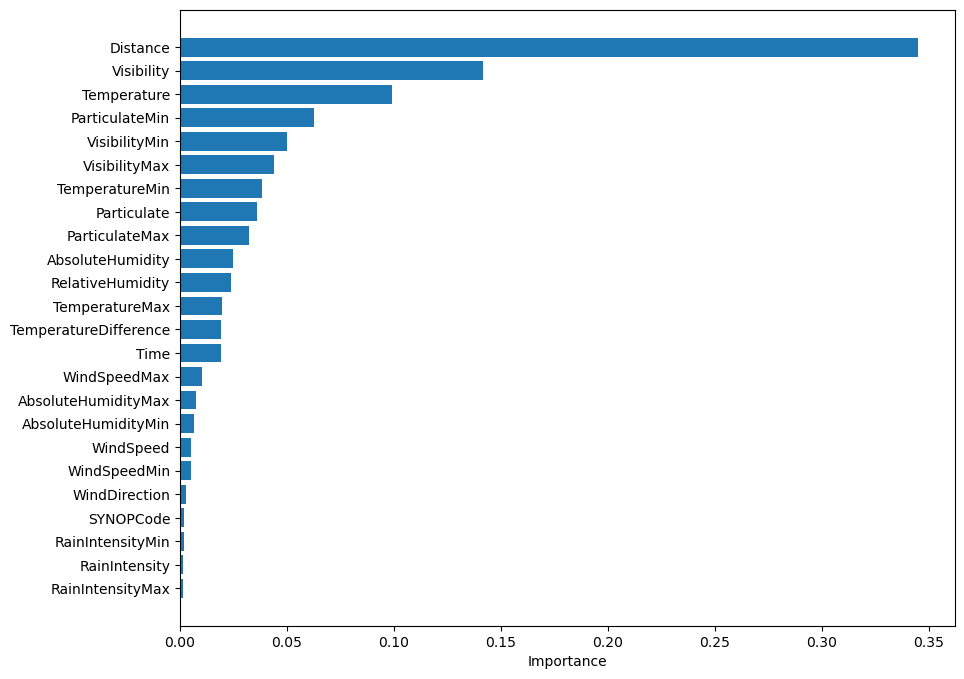

In [38]:
# plot the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': sorted_features_fso,
    'Importance': sorted_importance_fso
})

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.show()

In [ ]:
rfl_rf_model = RandomForestRegressor(n_estimators = 110, max_depth=28, min_samples_leaf = 1, random_state = 25,min_samples_split = 2)

In [40]:
rfl_rf_model.fit(Xtrain_rfl, Ytrain_rfl)
feature_importance = rfl_rf_model.feature_importances_
print("Feature Importance:", feature_importance)

sorted_features_rfl,sorted_importance_rfl = sort_features(rfl_rf_model,Xtrain_rfl,channel = "FSO",figure = False)


Feature Importance: [0.1958295  0.00635142 0.00666307 0.20629319 0.01139784 0.00332889
 0.00873378 0.00690811 0.22754944 0.07137468 0.08196204 0.01500175
 0.03351729 0.06926139 0.00661511 0.00873606 0.00659378 0.00643815
 0.00967285 0.00539885 0.00682154 0.00103438 0.00115261 0.00224579
 0.00111849]


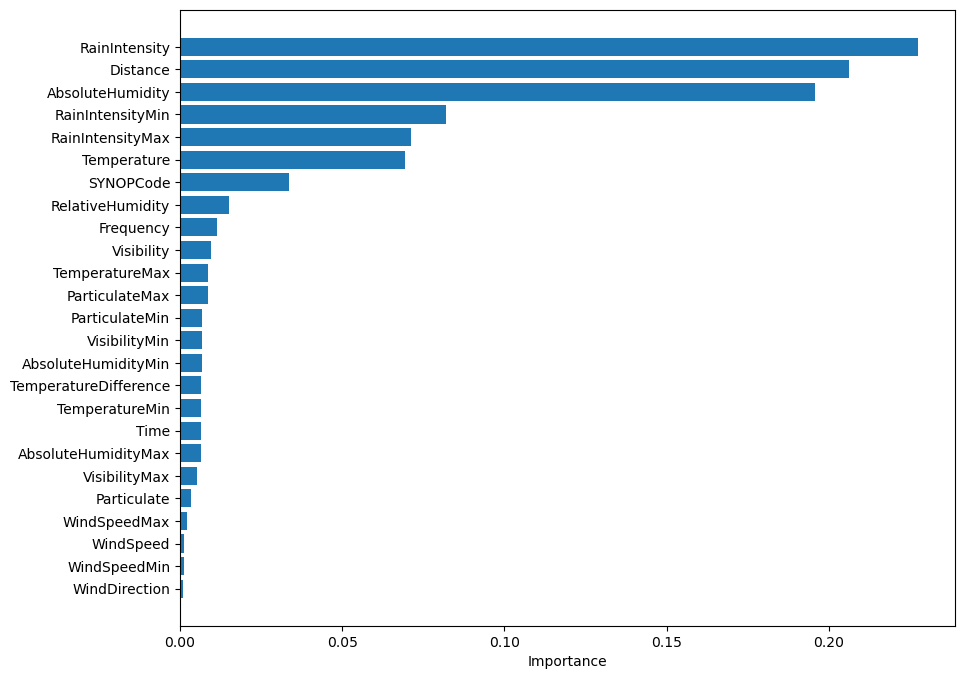

In [41]:
# plot the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': sorted_features_rfl,
    'Importance': sorted_importance_rfl
})

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.show()

# Feature Selection
## Store all the results Using OOB information

NOTE: all the results are stored, but the output was accidentally cleared, so only keep the code below. 

In [42]:
def metrics_cal(model,Xtrain,Ytrain,Xval,Yval,oob = True):
    y_pred_train = model.predict(Xtrain)
    y_pred_val = model.predict(Xval)
    
    train_rmse = mean_squared_error(Ytrain, y_pred_train, squared=False)
    val_rmse = mean_squared_error(Yval, y_pred_val, squared=False)
    print("Training RMSE:", train_rmse)
    print("Validation RMSE:", val_rmse)

    train_r2 = r2_score(Ytrain, y_pred_train)
    val_r2 = r2_score(Yval, y_pred_val)
    print("Train R²:", train_r2)
    print("Validation R²:", val_r2)
    
    if oob:
        oob_r2 = model.oob_score_
        print("OOB R²:", oob_r2)
    else:
        oob_r2 = None

    return train_rmse, train_r2,val_rmse,val_r2,oob_r2

In [ ]:
def oob_info(model,Xtrain,Ytrain,Xval,Yval,channel = "FSO"):
    
    performance_scores = []
    for i in range(len(Xtrain.columns)+1):
        if i == 0:
            model.fit(Xtrain, Ytrain)
            sorted_features, sorted_importance = \
                sort_features(model,Xtrain,channel = "FSO",figure = False)
            train_rmse, train_r2,val_rmse,val_r2,oob_r2= \
                metrics_cal(model,Xtrain,Ytrain,Xval,Yval,oob = True)
        else:
            remove_feature = sorted_features[0]
            features_list =  sorted_features[1::] 
            print(i,remove_feature,features_list) 

            if remove_feature and len(features_list) >= 1:
                model.fit(Xtrain[features_list], Ytrain)
                
                sorted_features, sorted_importance = \
                    sort_features(model,Xtrain[features_list] ,channel = "FSO",figure = False)
                train_rmse, train_r2,val_rmse,val_r2,oob_r2= \
                    metrics_cal(model,Xtrain[features_list],Ytrain,Xval[features_list],Yval,oob = True)
        
        if i == 0:
            performance_scores.append(("All Features",train_rmse, train_r2,val_rmse,val_r2, oob_r2,sorted_features[0],sorted_importance[0]))
        else:
            performance_scores.append((remove_feature,train_rmse, train_r2,val_rmse,val_r2, oob_r2,sorted_features[0],sorted_importance[0]))
    
    
    return performance_scores

In [ ]:
fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30,min_samples_leaf = 1, random_state = 25, min_samples_split =2, oob_score=True, n_jobs=6 )

performance_scores = oob_info(fso_rf_model,Xtrain_fso,Ytrain_fso,Xval_fso,Yval_fso,channel = "FSO")

important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_feature_importance.csv"
df.to_csv(file_name, index=False)  

In [ ]:
rfl_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=25, min_samples_leaf = 1, random_state = 25,min_samples_split = 2, oob_score=True,n_jobs=6)

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl,Ytrain_rfl,Xval_rfl,Yval_rfl,channel = "RFL")

important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_feature_importance.csv"
df.to_csv(file_name, index=False)  

### Specific Model

In [ ]:
# split the data based on SYNOPCode and store it seperately
data = pd.read_csv('RFLFSODataFull.csv')
data = data[data['TemperatureDifference'] != data['TemperatureDifference'].max()]

data["SYNOPCode"] = data["SYNOPCode"].astype(object)

# 0
data0 = data[data['SYNOPCode'] == 0]
data0.to_csv('data0.csv', index=False)

# 3
data3 = data[data['SYNOPCode'] == 3]
data3.to_csv('data3.csv', index=False)

# 4
data4 = data[data['SYNOPCode'] == 4]
data4.to_csv('data4.csv', index=False)

# 5
data5 = data[data['SYNOPCode'] == 5]
data5.to_csv('data5.csv', index=False)

# 6
data6 = data[data['SYNOPCode'] == 6]
data6.to_csv('data6.csv', index=False)

# 7
data7 = data[data['SYNOPCode'] == 7]
data7.to_csv('data7.csv', index=False)

# 8
data8 = data[data['SYNOPCode'] == 8]
data8.to_csv('data8.csv', index=False)

In [ ]:
# 0: clear
Xtrain_fso0, Xval_fso0, Xtest_fso0, Ytrain_fso0, Yval_fso0, Ytest_fso0 = split_data(data0, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl0, Xval_rfl0, Xtest_rfl0, Ytrain_rfl0, Yval_rfl0, Ytest_rfl0 = split_data(data0, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso0,Ytrain_fso0,Xval_fso0,Yval_fso0,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode0_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl0,Ytrain_rfl0,Xval_rfl0,Yval_rfl0,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode0_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 3: dust storm
Xtrain_fso3, Xval_fso3, Xtest_fso3, Ytrain_fso3, Yval_fso3, Ytest_fso3 = split_data(data3, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl3, Xval_rfl3, Xtest_rfl3, Ytrain_rfl3, Yval_rfl3, Ytest_rfl3 = split_data(data3, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso3,Ytrain_fso3,Xval_fso3,Yval_fso3,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode3_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl3,Ytrain_rfl3,Xval_rfl3,Yval_rfl3,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode3_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 4: fog
Xtrain_fso4, Xval_fso4, Xtest_fso4, Ytrain_fso4, Yval_fso4, Ytest_fso4 = split_data(data4, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl4, Xval_rfl4, Xtest_rfl4, Ytrain_rfl4, Yval_rfl4, Ytest_rfl4 = split_data(data4, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso4,Ytrain_fso4,Xval_fso4,Yval_fso4,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode4_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl4,Ytrain_rfl4,Xval_rfl4,Yval_rfl4,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode4_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 5: drizzle
Xtrain_fso5, Xval_fso5, Xtest_fso5, Ytrain_fso5, Yval_fso5, Ytest_fso5 = split_data(data5, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl5, Xval_rfl5, Xtest_rfl5, Ytrain_rfl5, Yval_rfl5, Ytest_rfl5 = split_data(data5, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso5,Ytrain_fso5,Xval_fso5,Yval_fso5,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode5_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl5,Ytrain_rfl5,Xval_rfl5,Yval_rfl5,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode5_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 6: rain
Xtrain_fso6, Xval_fso6, Xtest_fso6, Ytrain_fso6, Yval_fso6, Ytest_fso0 = split_data(data6, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl6, Xval_rfl6, Xtest_rfl6, Ytrain_rfl6, Yval_rfl6, Ytest_rfl0 = split_data(data6, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso6,Ytrain_fso6,Xval_fso6,Yval_fso6,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode6_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl6,Ytrain_rfl6,Xval_rfl6,Yval_rfl6,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode6_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 7: snow
Xtrain_fso7, Xval_fso7, Xtest_fso7, Ytrain_fso7, Yval_fso7, Ytest_fso7 = split_data(data7, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl7, Xval_rfl7, Xtest_rfl7, Ytrain_rfl7, Yval_rfl7, Ytest_rfl7 = split_data(data7, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso7,Ytrain_fso7,Xval_fso7,Yval_fso7,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode7_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl7,Ytrain_rfl7,Xval_rfl7,Yval_rfl7,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode7_feature_importance.csv"
df.to_csv(file_name, index=False) 

In [ ]:
# 8: showers
Xtrain_fso8, Xval_fso8, Xtest_fso8, Ytrain_fso8, Yval_fso8, Ytest_fso8 = split_data(data8, "FSO_Att",drop_column = ["Frequency",'RFL_Att'])
Xtrain_rfl8, Xval_rfl8, Xtest_rfl8, Ytrain_rfl8, Yval_rfl8, Ytest_rfl8 = split_data(data8, "RFL_Att",drop_column = ['FSO_Att'])


performance_scores = oob_info(fso_rf_model,Xtrain_fso8,Ytrain_fso8,Xval_fso8,Yval_fso8,channel = "FSO")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_synopcode8_feature_importance.csv"
df.to_csv(file_name, index=False) 

performance_scores = oob_info(rfl_rf_model,Xtrain_rfl8,Ytrain_rfl8,Xval_rfl8,Yval_rfl8,channel = "RFL")
important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "RF_synopcode8_feature_importance.csv"
df.to_csv(file_name, index=False) 

# Feature Selection

In [45]:
abbr = {'All Features': 'All',
        'WindDirection': 'Wind_Direction',
        'WindSpeed': 'Wind_Speed',
        'WindSpeedMin': 'Wind_Spped_Min',
        'ParticulateMin': 'Part_Min',
        'WindSpeedMax': 'Wind_Spped_Max',
        'TemperatureMin': 'Temp_Min',
        'TemperatureMax': 'Temp_Max',
        'Particulate': 'Part_Count',
        'VisibilityMin': 'Visibility_Min',
        'AbsoluteHumidityMax': 'AH_Max',
        'TemperatureDifference': 'Temp_Diff',
        'AbsoluteHumidityMin': 'AH_Min',
        'Time': 'Hour',
        'VisibilityMax': 'Visibility_Max',
        'Frequency': 'Freq',
        'RelativeHumidity': 'RH',
        'ParticulateMax': 'Part_Max',
        'Visibility': 'Visibility',
        'SYNOPCode': 'SC',
        'Temperature': 'Temp',
        'RainIntensityMin': 'RI_Min',
        'RainIntensityMax': 'RI_Max',
        'Distance': 'Dist',
        'RainIntensity': 'RI',
        'AbsoluteHumidity': 'AH'}

In [ ]:
def plot_feature_importance_code(df,code, cut="VisibilityMin", channel="FSO", markersize=10, legend_loc="lower left", legend_loc1="upper left",legend_valid = 0,legend_x1 = 0.2,legend_y1 = 0.4,legend_x2 = 0.5,legend_y2 = 0.4):

    # set the numbers for each SYNOPCode
    if code == 0:
        weather = "Clear"
        train_num = 39875
        test_num = 17089
    elif code == 3:
        weather = "Dust Storm"
        train_num = 134 
        test_num = 57
    elif code == 4:
        weather = "Fog"
        train_num = 326 
        test_num = 140
    elif code == 5:
        weather = "Drizzle"
        train_num = 4623 
        test_num = 1982
    elif code == 6:
        weather = "Rain"
        train_num = 17513 
        test_num = 7505
    elif code == 7:
        weather = "Snow"
        train_num = 293 
        test_num = 126
    elif code == 8:
        weather = "Showers"
        train_num = 1201 
        test_num = 515
    else:
        weather = "All Weather"
        train_num = 63965 
        test_num = 27414

    df["remove_feature"] = df["remove_feature"].map(abbr)
    remove_features = df["remove_feature"]
    val_rmse = df["val_rmse"]
    oob_r2 = df["oob_r2"]

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax2 = ax1.twinx()  
    ax1.plot(remove_features, val_rmse, markersize=markersize, color='blue', label="test_rmse")
    ax2.plot(remove_features, oob_r2, markersize=markersize, color='orange', label="oob_r2")

    ax1.set_ylabel('RMSE (dB)', fontsize=20, color='b')
    ax1.tick_params(axis='y', labelsize=18, colors='b')
    
    ax2.set_ylabel('RSquare', fontsize=20, color='orange')
    ax2.tick_params(axis='y', labelsize=18, colors='orange')
    
    ax1.set_title(f'{channel} for {weather}', fontsize=20)
    ax1.grid(True)
    
    ax1.set_xticks(remove_features)
    ax1.set_xticklabels(remove_features, rotation=80, fontsize=20)
    
    index = remove_features.tolist().index(cut)
    ax1.axvline(x=index, color='green', linestyle='--')

    plt.tight_layout()
    plt.show()
    return fig


In [ ]:
weather_list = ["Clear","Dust Storm","Fog","Drizzle","Rain","Snow","Showers"]
RFL_specific_rmse_list = []
RFL_specific_r2_list = []
FSO_specific_rmse_list = []
FSO_specific_r2_list = []

# 0: Clear
df = pd.read_csv("RF_synopcode0_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-11]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-11]['val_r2'])
fig0_1 = plot_feature_importance_code(df, code = 0, cut ="RH", channel="RFL", markersize=10,legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode0_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-11]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-11]['val_r2'])
fig0_2= plot_feature_importance_code(df, code = 0,cut ="Temp_Diff", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

# 3: Dust Storm
df= pd.read_csv("RF_synopcode3_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-13]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-13]['val_r2'])
fig3_1= plot_feature_importance_code(df, code = 3,cut="Dist", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center",legend_valid = 1,legend_x1 = 0.1,legend_y1= 0.3,legend_x2=0.4,legend_y2=0.3)

df = pd.read_csv("FSO_synopcode3_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-7]['val_r2'])
fig3_2= plot_feature_importance_code(df, code = 3,cut="Visibility", channel="FSO", markersize=10,legend_loc="center left", legend_loc1="center" )

# 4: Fog
df= pd.read_csv("RF_synopcode4_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-10]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-10]['val_r2'])
fig4_1= plot_feature_importance_code(df, code = 4,cut="Visibility", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode4_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-10]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-10]['val_r2'])
fig4_2= plot_feature_importance_code(df, code = 4,cut="Temp_Max", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

# 5: Drizzle
df= pd.read_csv("RF_synopcode5_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-12]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-12]['val_r2'])
fig5_1= plot_feature_importance_code(df, code = 5,cut="Part_Max", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center",legend_valid = 1,legend_x1 = 0.1,legend_y1= 0.5,legend_x2=0.3,legend_y2=0.5)

df = pd.read_csv("FSO_synopcode5_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-6]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-6]['val_r2'])
fig5_2= plot_feature_importance_code(df, code = 5,cut="Part_Max", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

# 6: Rain
df= pd.read_csv("RF_synopcode6_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-9]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-9]['val_r2'])
fig6_1= plot_feature_importance_code(df, code = 6,cut="Part_Min", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode6_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-12]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-12]['val_r2'])
fig6_2= plot_feature_importance_code(df, code = 6,cut="Temp_Max", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

# 7: Snow
df= pd.read_csv("RF_synopcode7_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-7]['val_r2'])
fig7_1= plot_feature_importance_code(df, code = 7,cut="RI_Max", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode7_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-9]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-9]['val_r2'])
fig7_2= plot_feature_importance_code(df, code = 7,cut="Temp", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center",legend_valid = 1,legend_x1 = 0.1,legend_y1= 0.3,legend_x2=0.4, legend_y2=0.3)

# 8: Showers
df = pd.read_csv("RF_synopcode8_feature_importance.csv")
RFL_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-7]['val_r2'])
fig8_1= plot_feature_importance_code(df, code = 8,cut="Part_Max", channel="RFL",markersize=10, legend_loc="center left", legend_loc1="center",legend_valid = 1,legend_x1 = 0.1,legend_y1= 0.5,legend_x2=0.3, legend_y2=0.5)

df = pd.read_csv("FSO_synopcode8_feature_importance.csv")
FSO_specific_rmse_list.append(df.iloc[-11]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-11]['val_r2'])
fig8_2= plot_feature_importance_code(df, code = 8,cut="Part_Min", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

# All Weather
df = pd.read_csv("RF_feature_importance.csv")
figa_1= plot_feature_importance_code(df, code = 9,cut="Visibility_Min", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_feature_importance.csv")
figa_2= plot_feature_importance_code(df, code = 9,cut="Temp_Max", channel="FSO",markersize=10, legend_loc="center left", legend_loc1="center",legend_valid = 1,legend_x1 = 0.1,legend_y1= 0.5,legend_x2=0.3, legend_y2=0.5)


## Plot the figure seperately

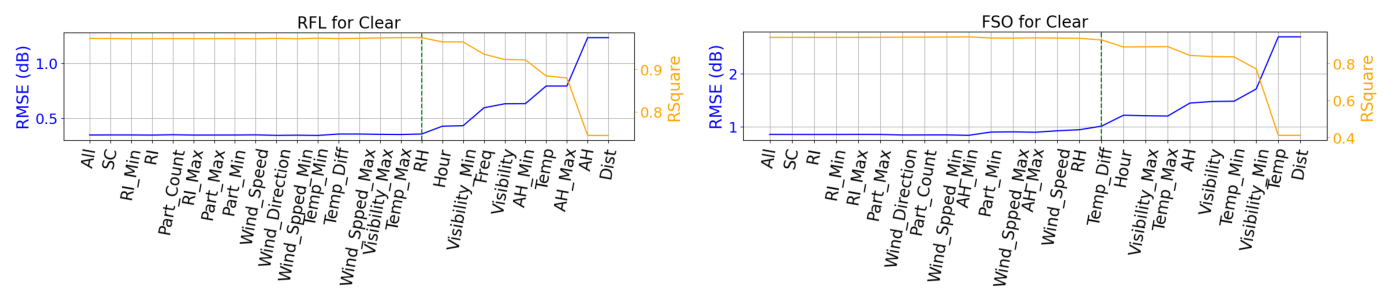

In [49]:
# Clear
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig0_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig0_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

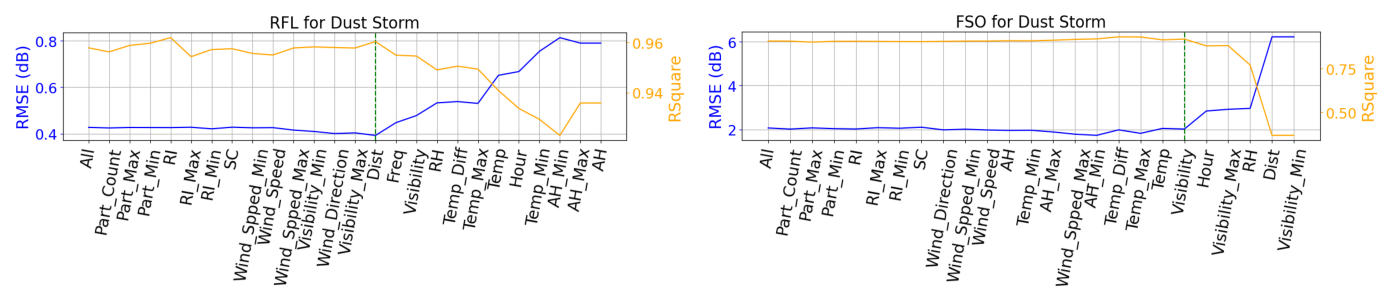

In [50]:
# Dust Storm
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig3_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig3_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

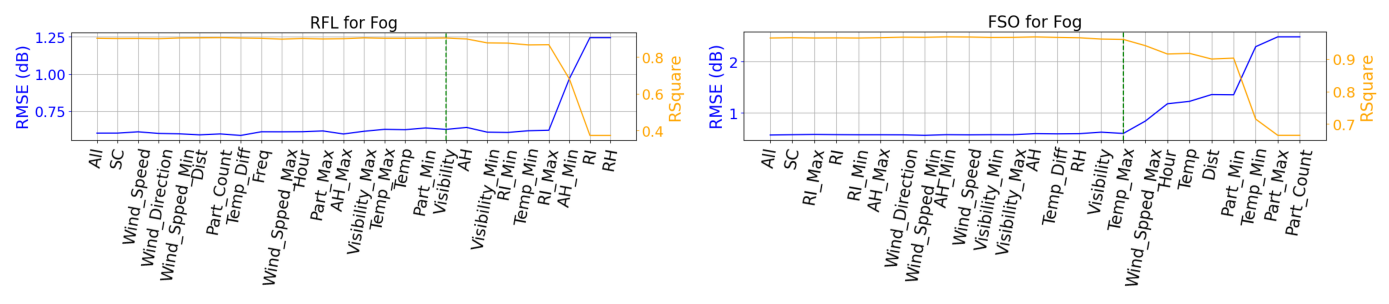

In [51]:
# Fog
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig4_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig4_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

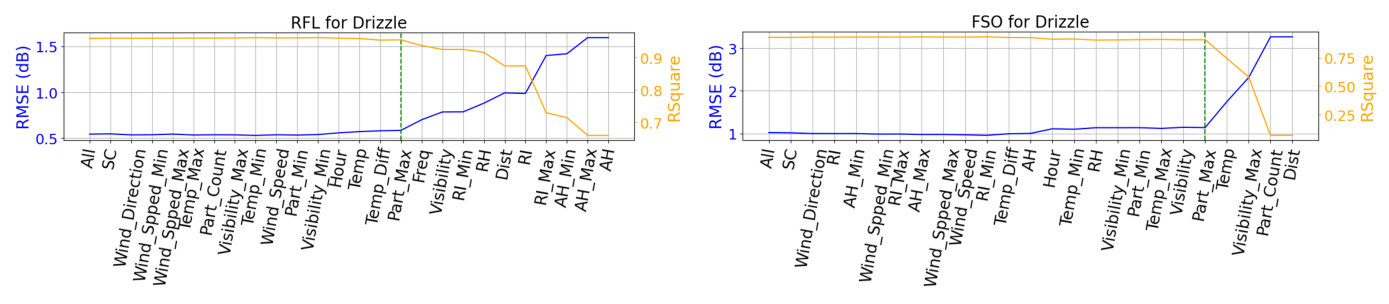

In [52]:
# Drizzle
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig5_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig5_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

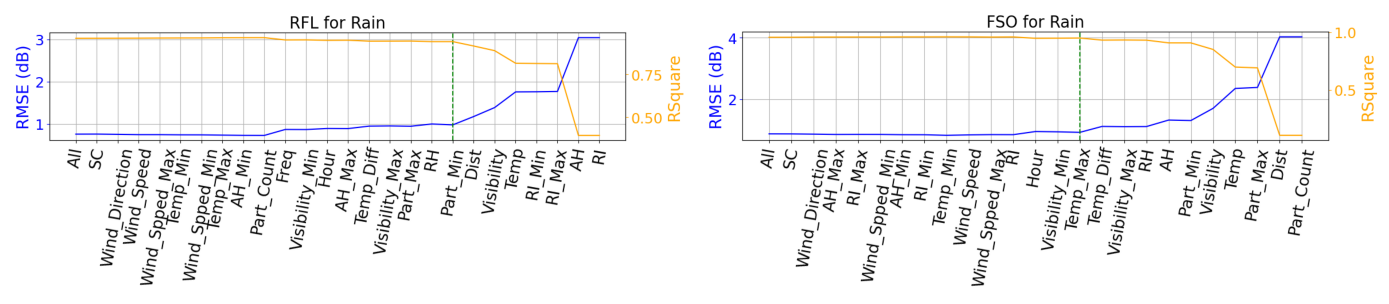

In [53]:
# Rain
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig6_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig6_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

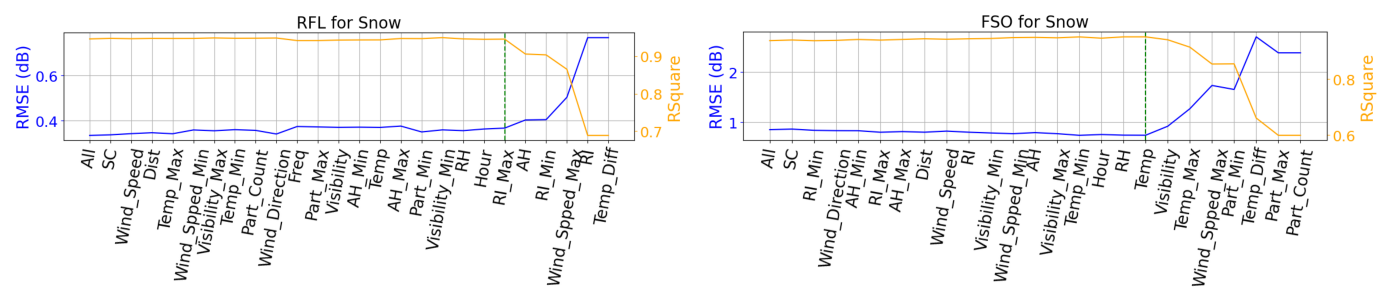

In [54]:
# Snow
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig7_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig7_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

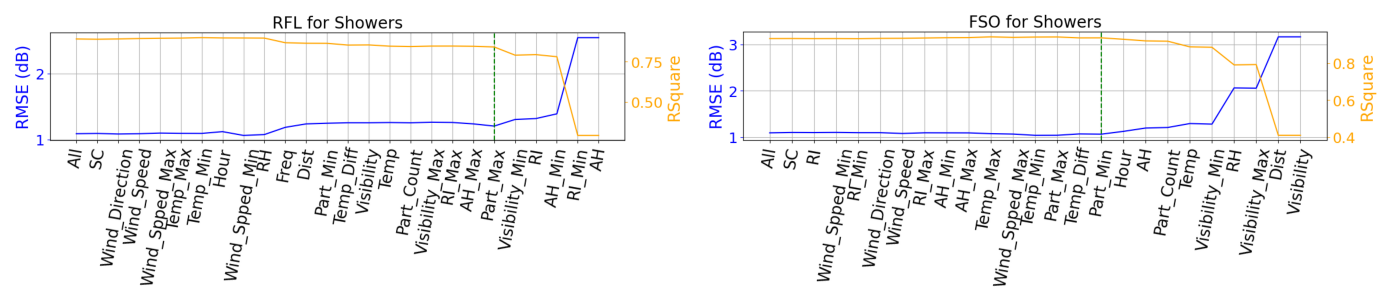

In [55]:
# Showers
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(fig8_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(fig8_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

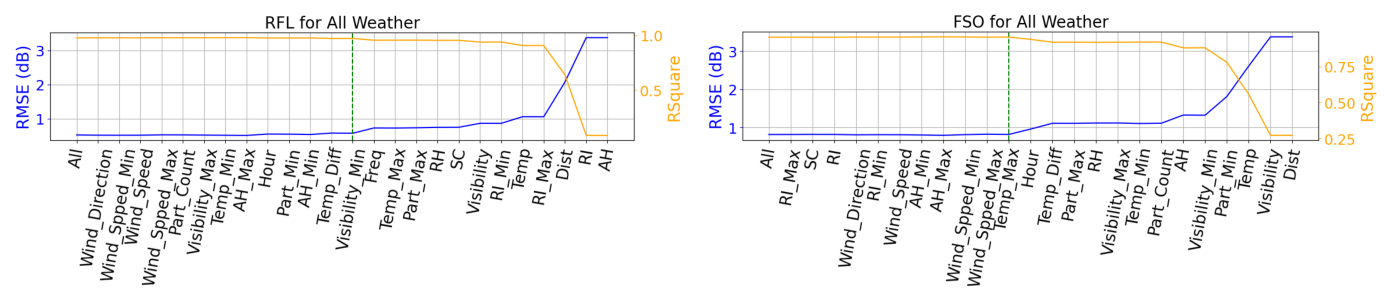

In [56]:
# All Weather
fig = plt.figure(figsize=(14, 6))  

ax1 = fig.add_subplot(1, 2, 1)  
ax1.imshow(figa_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])
ax1.set_axis_off()  

ax2 = fig.add_subplot(1, 2, 2)  
ax2.imshow(figa_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])
ax2.set_axis_off()  

plt.tight_layout()
plt.show()

In [60]:
print(RFL_specific_rmse_list)
print(FSO_specific_rmse_list)

print(RFL_specific_r2_list)
print(FSO_specific_r2_list)

[0.3493900728414564, 0.4029050504957404, 0.6376801098925037, 0.578865045088653, 0.9939244652712652, 0.3636080306029378, 1.2367447850740525]
[0.9402242642538484, 2.050135465470775, 0.6266238703696128, 1.1446920780284084, 0.9465713870879116, 0.7430581117954472, 1.0700768970746812]
[0.981349119458053, 0.9827112772793288, 0.8471504087331434, 0.959581869533352, 0.9338621048546044, 0.9372103726815276, 0.841321706858894]
[0.9277071597329052, 0.9442595745677907, 0.975412970273856, 0.8996456380788139, 0.9485878048068516, 0.9823882561398336, 0.9157861650428208]


In [61]:
def filter(X, Y, code = 9):

    trainset = pd.concat([X, Y], axis=1)
    
    if code == 9:
        Xdata = X
        Ydata = Y
    else:
        filtered_data = trainset[trainset['SYNOPCode'] == code]
        
        Xdata = filtered_data.iloc[:, :-1]  
        Ydata = filtered_data.iloc[:, -1]   
    
    return Xdata, Ydata

In [ ]:
FSO_extractF = ['TemperatureMax','Time','TemperatureDifference','ParticulateMax','RelativeHumidity','VisibilityMax','TemperatureMin','Particulate','AbsoluteHumidity','VisibilityMin','ParticulateMin','Temperature','Visibility','Distance']
RFL_extractF = ['VisibilityMin','Frequency','TemperatureMax','ParticulateMax','RelativeHumidity','SYNOPCode','Visibility','RainIntensityMin','Temperature','RainIntensityMax','Distance','RainIntensity','AbsoluteHumidity']

for code in [9]: 
    Xtrain_rfl_s, Ytrain_rfl_s = filter(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = filter(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = filter(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = filter(Xval_fso, Yval_fso, code)

rfl_rf_model.fit(Xtrain_rfl_s[RFL_extractF], Ytrain_rfl_s)
fso_rf_model.fit(Xtrain_fso_s[FSO_extractF], Ytrain_fso_s)

RandomForestRegressor(max_depth=34, n_estimators=150, n_jobs=6, oob_score=True,
                      random_state=25)

In [ ]:
RFL_generic_rmse_list = []
RFL_generic_r2_list = []
FSO_generic_rmse_list = []
FSO_generic_r2_list = []
SYNOPCodes = [0, 3, 4, 5, 6, 7, 8]

for code in SYNOPCodes:
    Xtrain_rfl_s, Ytrain_rfl_s = filter(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = filter(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = filter(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = filter(Xval_fso, Yval_fso, code)

    train_rmse, train_r2,val_rmse,val_r2,oob_r2= metrics_cal(rfl_rf_model,Xtrain_rfl_s[RFL_extractF],Ytrain_rfl_s,Xval_rfl_s[RFL_extractF],Yval_rfl_s,oob = True)
    
    RFL_generic_rmse_list.append(val_rmse)
    RFL_generic_r2_list.append(val_r2)
    train_rmse, train_r2,val_rmse,val_r2,oob_r2= metrics_cal(fso_rf_model,Xtrain_fso_s[FSO_extractF],Ytrain_fso_s,Xval_fso_s[FSO_extractF],Yval_fso_s,oob = True)
   
    FSO_generic_rmse_list.append(val_rmse)
    FSO_generic_r2_list.append(val_r2)

In [70]:
print(RFL_generic_rmse_list)
print(FSO_generic_rmse_list)

print(RFL_generic_r2_list)
print(FSO_generic_r2_list)

[0.44302013390623574, 0.28188442297600425, 0.35501283421890195, 0.510519411999008, 0.8054061758096067, 0.44855097139747613, 0.7992278739588053]
[0.8343795514783681, 1.2774736896421683, 0.7710454333597042, 0.8269715061340583, 0.8420592478825106, 1.6197083240952417, 1.0395873337469812]
[0.970186182526062, 0.9906658119836924, 0.9400608179422109, 0.9688388950491175, 0.9608590700317494, 0.9173796260286139, 0.9252891982050079]
[0.9438251181301318, 0.971645450562373, 0.964100042608124, 0.9476790901637651, 0.9627314323458103, 0.913703885024865, 0.9262353522290013]


# Comparison

In [71]:
RFL_rmse_diff = [f"{(b - a):.3f}" for a, b in zip(RFL_specific_rmse_list, RFL_generic_rmse_list)]
RFL_rmse_percent = [
    f"{((b - a) / b) * 100:.3f}%" if b != 0 else "N/A"
    for a, b in zip(RFL_specific_rmse_list, RFL_generic_rmse_list)
]
RFL_rmse_diff

['0.094', '-0.121', '-0.283', '-0.068', '-0.189', '0.085', '-0.438']

In [72]:
RFL_rmse_percent

['21.134%',
 '-42.933%',
 '-79.622%',
 '-13.387%',
 '-23.407%',
 '18.937%',
 '-54.742%']

In [73]:
RFL_r2_diff = [f"{(b - a):.3f}" for a, b in zip(RFL_specific_r2_list, RFL_generic_r2_list)]
RFL_r2_percent = [
    f"{((b - a) / b) * 100:.3f}%" if b != 0 else "N/A"
    for a, b in zip(RFL_specific_r2_list, RFL_generic_r2_list)
]
RFL_r2_percent

['-1.151%', '0.803%', '9.883%', '0.955%', '2.810%', '-2.162%', '9.075%']

In [74]:
FSO_rmse_diff = [f"{(b - a):.3f}" for a, b in zip(FSO_specific_rmse_list, FSO_generic_rmse_list)]
FSO_rmse_percent = [
    f"{((b - a) / b) * 100:.3f}%" if b != 0 else "N/A"
    for a, b in zip(FSO_specific_rmse_list, FSO_generic_rmse_list)
]
FSO_rmse_percent

['-12.685%',
 '-60.484%',
 '18.731%',
 '-38.420%',
 '-12.411%',
 '54.124%',
 '-2.933%']

In [75]:
FSO_r2_diff = [f"{(b - a):.3f}" for a, b in zip(FSO_specific_r2_list, FSO_generic_r2_list)]
FSO_r2_percent = [
    f"{((b - a) / b) * 100:.3f}%" if b != 0 else "N/A"
    for a, b in zip(FSO_specific_r2_list, FSO_generic_r2_list)
]
FSO_r2_percent

['1.708%', '2.819%', '-1.173%', '5.069%', '1.469%', '-7.517%', '1.128%']

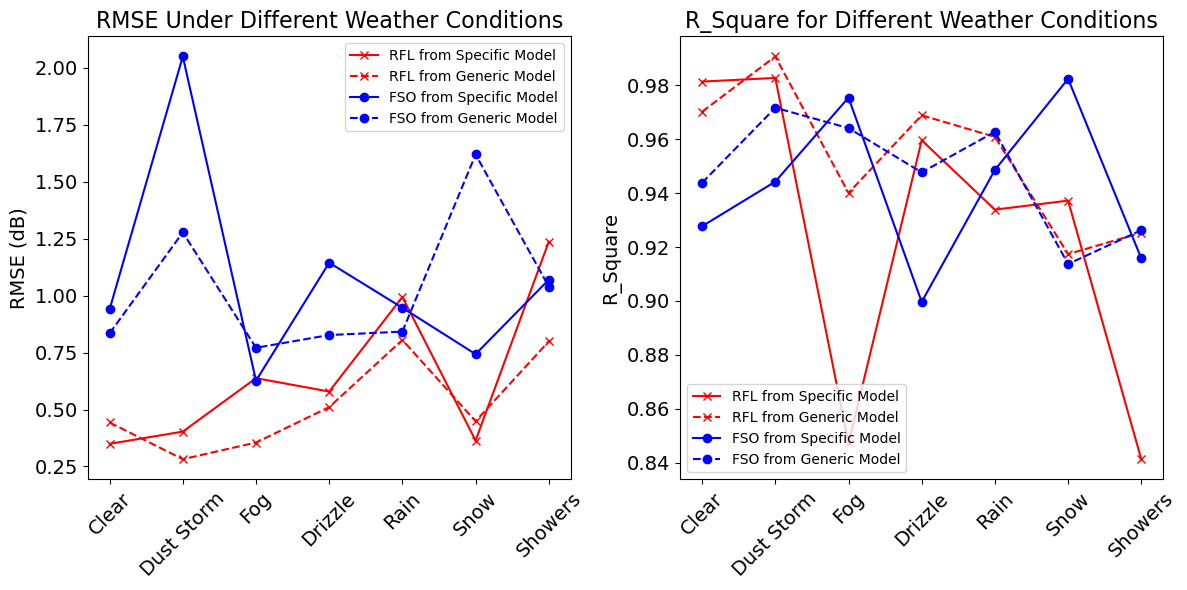

In [76]:
weather_list = ["Clear","Dust Storm","Fog","Drizzle","Rain","Snow","Showers"]

# RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.plot(weather_list, RFL_specific_rmse_list, color='r', marker='x', label='RFL from Specific Model')
plt.plot(weather_list, RFL_generic_rmse_list, color='r',  marker='x', linestyle='--', label='RFL from Generic Model')
plt.plot(weather_list, FSO_specific_rmse_list, color='b', marker='o', label='FSO from Specific Model')
plt.plot(weather_list, FSO_generic_rmse_list, color='b', marker='o', linestyle='--', label='FSO from Generic Model')

plt.ylabel('RMSE (dB)', fontsize = 14)
plt.title('RMSE Under Different Weather Conditions', fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()

# R_Square
plt.subplot(1, 2, 2)  
plt.plot(weather_list, RFL_specific_r2_list, color='r', marker='x', label='RFL from Specific Model')
plt.plot(weather_list, RFL_generic_r2_list, color='r',  marker='x', linestyle='--', label='RFL from Generic Model')
plt.plot(weather_list, FSO_specific_r2_list, color='b', marker='o', label='FSO from Specific Model')
plt.plot(weather_list, FSO_generic_r2_list, color='b', marker='o', linestyle='--', label='FSO from Generic Model')

plt.ylabel('R_Square', fontsize = 14)
plt.title('R_Square for Different Weather Conditions', fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend() 


plt.tight_layout()
plt.show()
